In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Reading and Visualising the data

In [59]:
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [60]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


No conversion of data types is needed since all columns have appropriate data types as is.

In [61]:
 country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [62]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [63]:
# Shape of the dataset

country_df.shape

(167, 10)

# Cleaning the data

In [64]:
# Checking missing values

round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no missing values present in the data set, hence no cleaning or imputing of the data is required.

# Preparing the data for clustering

In [65]:
# Since columns 'exports','imports', and 'health' are given as percentages of the column 'gdpp', converting these columns to their absolute values.

country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100

#  Exploratory Data Analysis

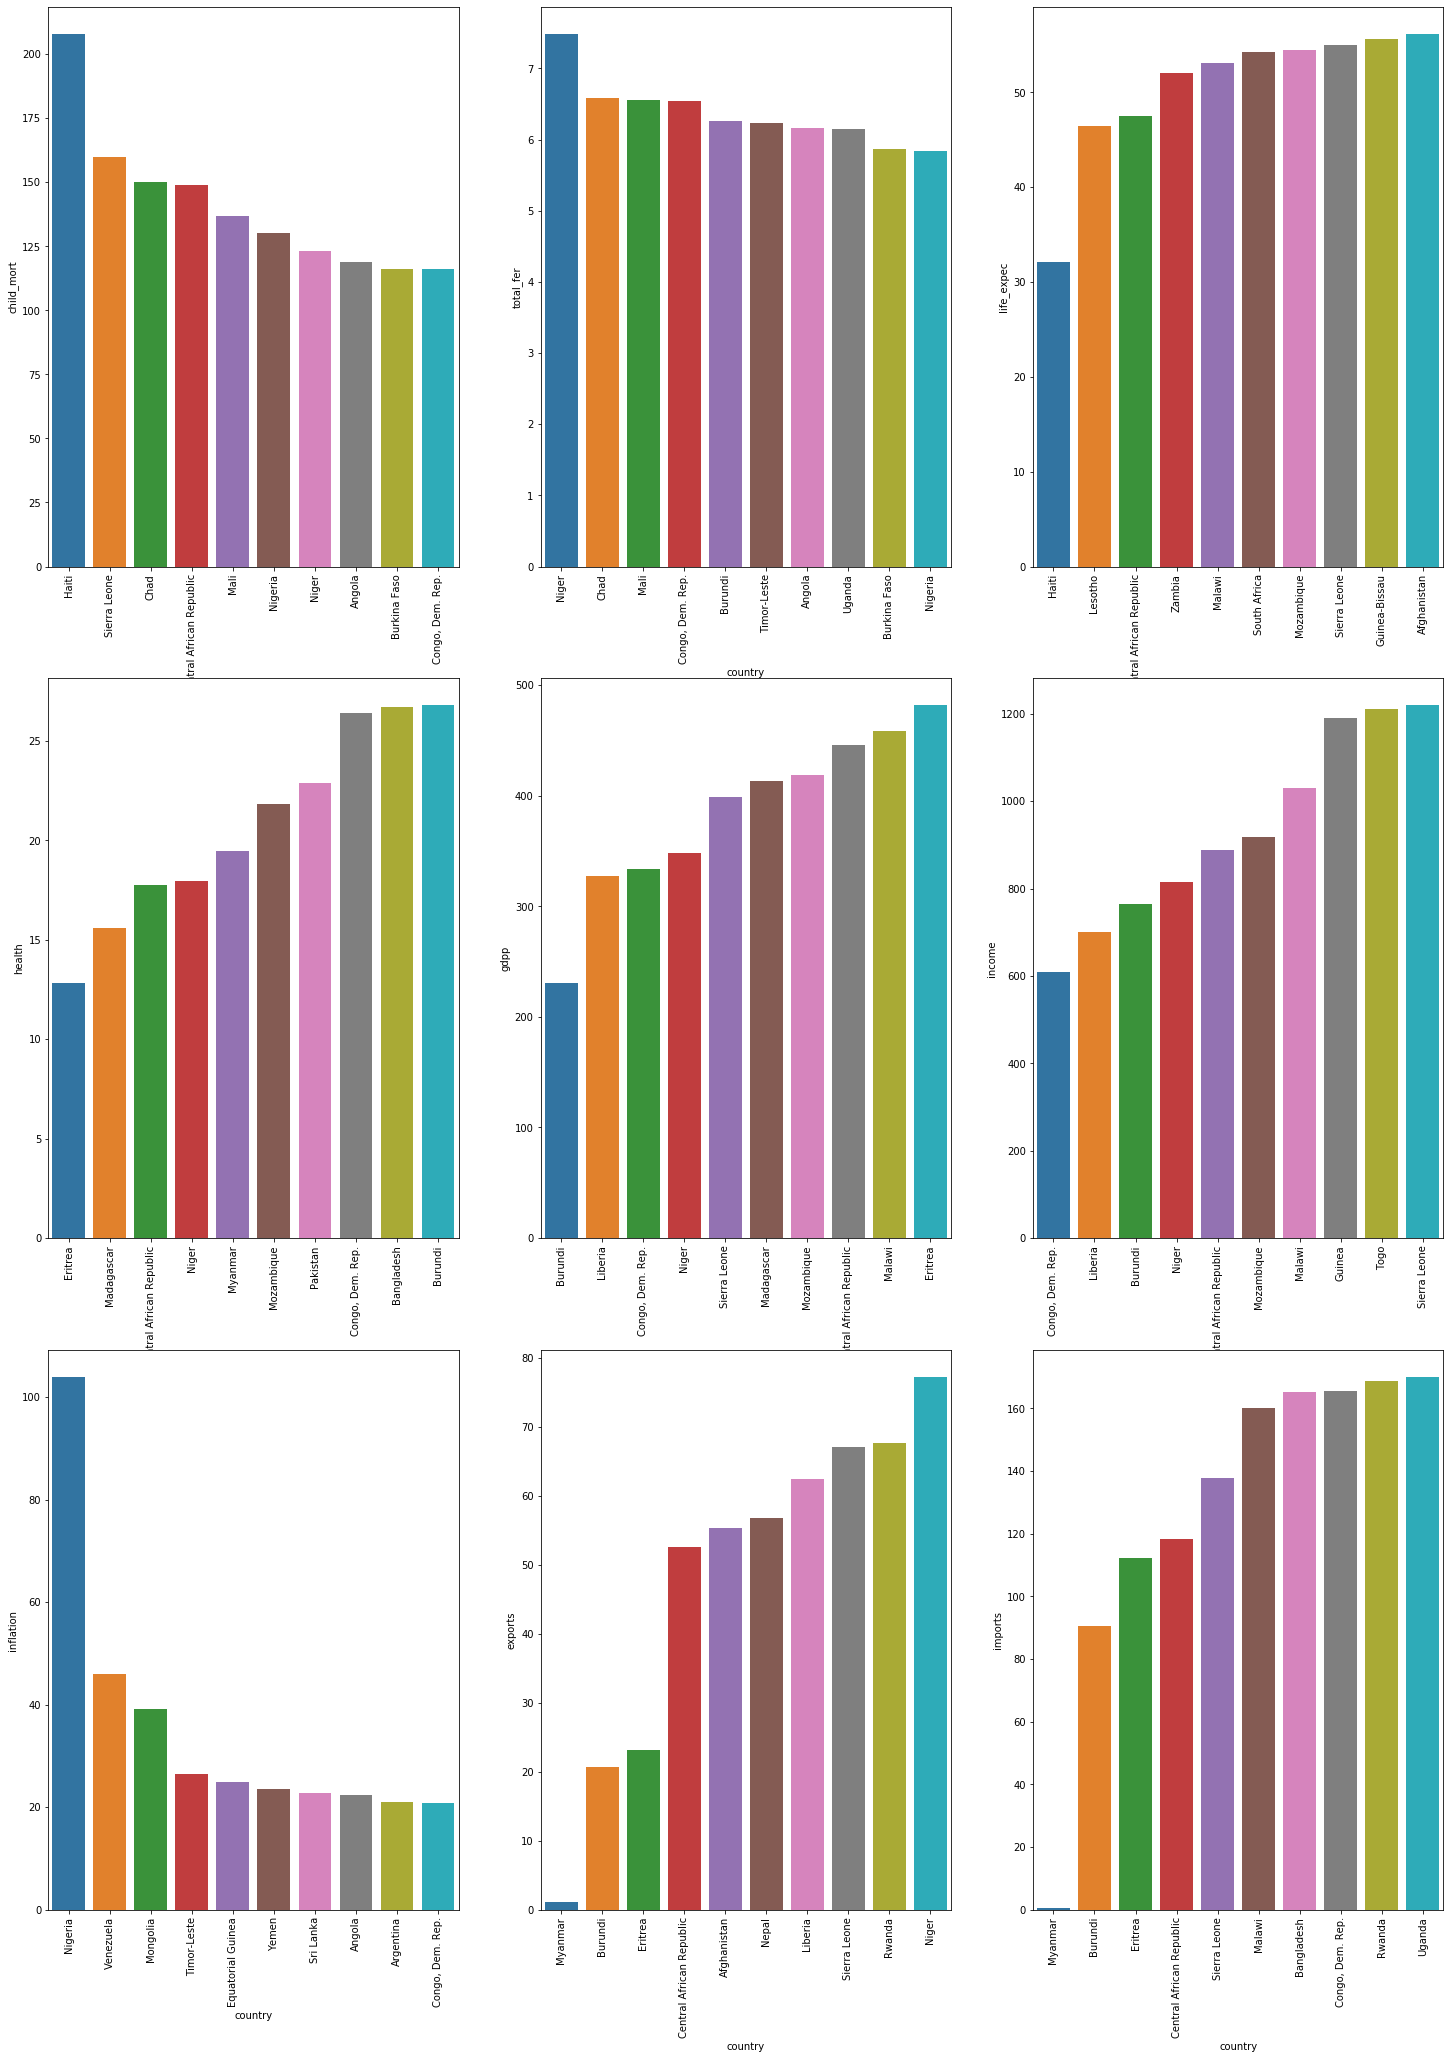

In [66]:
plt.figure(figsize = (25,35))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.subplot(3,3,1)
top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.subplot(3,3,2)
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.subplot(3,3,3)
bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# Health :Total health spending as %age of Total GDP.
plt.subplot(3,3,4)
bottom10_health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.subplot(3,3,5)
bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# Per capita Income : Net income per person
plt.subplot(3,3,6)
bottom10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# Inflation: The measurement of the annual growth rate of the Total GDP
plt.subplot(3,3,7)
top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.subplot(3,3,8)
bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.subplot(3,3,9)
bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

plt.show()

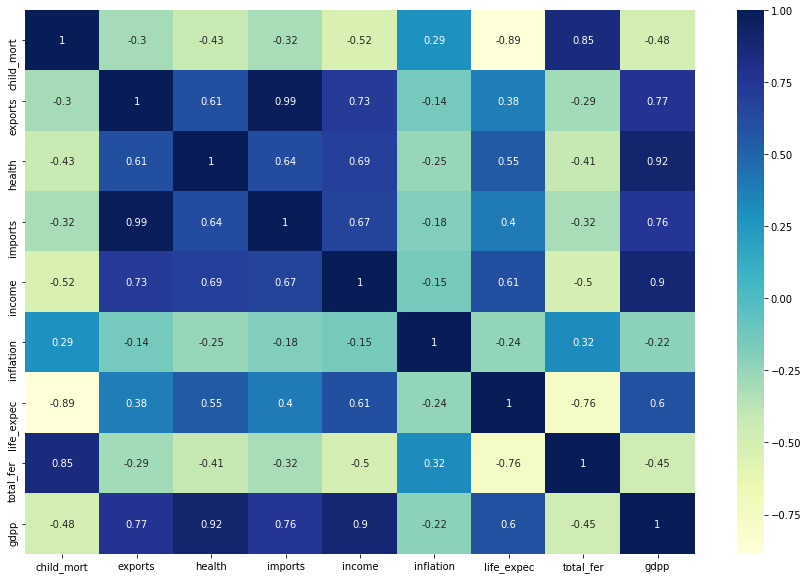

In [67]:
# Checking correlation coefficients

plt.figure(figsize = (15,10))   
sns.heatmap(country_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

- child_mortality and life_expentency have a correlation coefficient of -0.89
- exports and health have a correlation coefficient of 0.82
- health and imports have a correlation coefficient of 0.82
- health and gdpp have a correlation coefficient of 0.78
- income and gdpp have a correlation coefficient of 0.9
- imports and exports are highly correlated with correlation of 0.75
- life_expentency and total_fertility have a correlation coefficient of -0.76
- child_mortality and total_fertility have a correlation coefficient of 0.85

# Outlier Treatment

#### Checking columns for presence of outliers:

In [68]:
country_df.child_mort.quantile([0.5, 0.7,0.9, 0.95,0.97, 0.99, 1.0])

0.50     19.30
0.70     50.00
0.90    100.22
0.95    116.00
0.97    130.14
0.99    153.40
1.00    208.00
Name: child_mort, dtype: float64

In [69]:
country_df.exports.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

0.50      1777.44
0.70      5517.88
0.90     17760.60
0.95     31385.10
0.99     64794.26
1.00    183750.00
Name: exports, dtype: float64

In [70]:
country_df.health.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

0.50     321.8860
0.70     757.0880
0.90    3825.4160
0.95    4966.7010
0.99    8410.3304
1.00    8663.6000
Name: health, dtype: float64

In [71]:
country_df.imports.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

0.50      2045.580
0.70      5310.424
0.90     15034.280
0.95     24241.560
0.99     55371.390
1.00    149100.000
Name: imports, dtype: float64

In [72]:
country_df.income.quantile([0.5, 0.7,0.9, 0.95,0.96,0.97,0.98, 0.99, 1.0])

0.50      9960.0
0.70     19540.0
0.90     41220.0
0.95     48290.0
0.96     56256.0
0.97     62496.0
0.98     74208.0
0.99     84374.0
1.00    125000.0
Name: income, dtype: float64

In [73]:
country_df.gdpp.quantile([0.5, 0.7,0.9, 0.95,0.97, 0.99, 1.0])

0.50      4660.0
0.70     11920.0
0.90     41840.0
0.95     48610.0
0.97     52218.0
0.99     79088.0
1.00    105000.0
Name: gdpp, dtype: float64

In [74]:
country_df.inflation.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

0.50      5.390
0.70      8.964
0.90     16.640
0.95     20.870
0.99     41.478
1.00    104.000
Name: inflation, dtype: float64

In [75]:
country_df.life_expec.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

0.50    73.10
0.70    76.40
0.90    80.40
0.95    81.40
0.99    82.37
1.00    82.80
Name: life_expec, dtype: float64

In [76]:
country_df.total_fer.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])


0.50    2.4100
0.70    3.3400
0.90    5.3220
0.95    5.8610
0.99    6.5636
1.00    7.4900
Name: total_fer, dtype: float64

#### Columns 'child_mort', 'exports', 'imports', 'income', 'gdpp', and 'inflation' have outliers present, and require treatment.

In [77]:
# Outlier treatment for child_mort:
Q1 = country_df['child_mort'].quantile(0.01)
Q2 = country_df['child_mort'].quantile(0.99)
IQR = Q2-Q1
country_df = country_df[(country_df.child_mort >= Q1 - 1.5*IQR) & (country_df.child_mort <= Q2 + 1.5*IQR)]


# Outlier treatment for income :
Q1 = country_df['income'].quantile(0.01)
Q2 = country_df['income'].quantile(0.99)
IQR = Q2-Q1
country_df = country_df[(country_df.income >= Q1 - 1.5*IQR) & (country_df.income <= Q2 + 1.5*IQR)]

# Outlier treatment for inflation:
Q1 = country_df['inflation'].quantile(0.01)
Q2 = country_df['inflation'].quantile(0.99)
IQR = Q2-Q1
country_df = country_df[(country_df.inflation >= Q1 - 1.5*IQR) & (country_df.inflation <= Q2 + 1.5*IQR)]

# Outlier treatment for gdpp:
Q1 = country_df['gdpp'].quantile(0.01)
Q2 = country_df['gdpp'].quantile(0.99)
IQR = Q2-Q1
country_df = country_df[(country_df.gdpp >= Q1 - 1.5*IQR) & (country_df.gdpp <= Q2 + 1.5*IQR)]

# Outlier treatment for imports:
Q1 = country_df['imports'].quantile(0.01)
Q2 = country_df['imports'].quantile(0.99)
IQR = Q2-Q1
country_df = country_df[(country_df.imports >= Q1 - 1.5*IQR) & (country_df.imports <= Q2 + 1.5*IQR)]

# Outlier treatment for exports:
Q1 = country_df['exports'].quantile(0.01)
Q2 = country_df['exports'].quantile(0.99)
IQR = Q2-Q1
country_df = country_df[(country_df.exports >= Q1 - 1.5*IQR) & (country_df.exports <= Q2 + 1.5*IQR)]

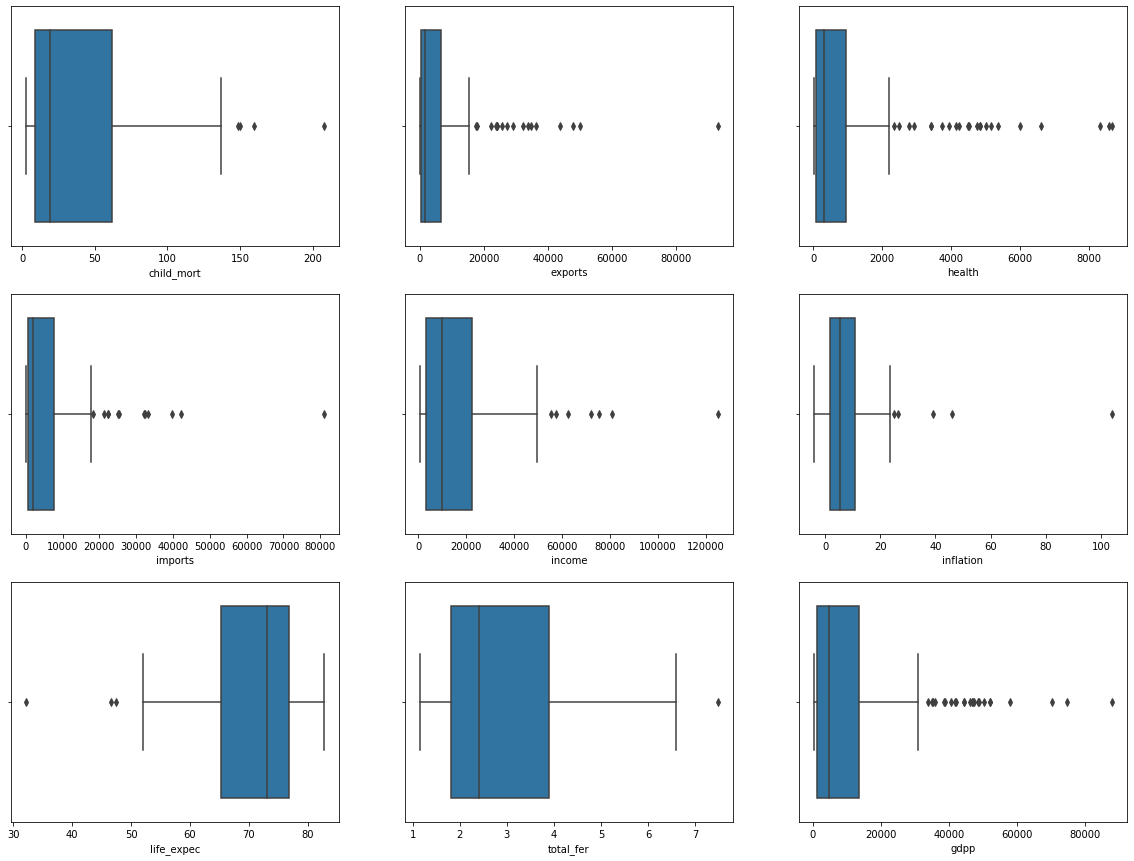

In [78]:
# Plots after outlier treatment

plt.figure(figsize=(20,15))
features = country_df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

In [79]:
# Dropping 'country' as final dataframe will only contain data columns

df_country_drop = country_df.copy()
country = df_country_drop.pop('country')

In [80]:
df_country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Hopkins Check

#### Hopkins Statistic will give a value indicating if the data is good for clustering or not

In [81]:
# Function to calculate Hopkins Statistic:

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [82]:
# Checking value of Hopkins Statistic for the given dataset:

hopkins(df_country_drop)


0.9580188302475705

#### Value of Hopkins Statistic comes out to be 0.958 for the given dataset, thus indicating a very high clustering tendency!

# Rescaling Features

In [83]:
rfm_df = df_country_drop

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285378,-0.543227,-0.566958,-0.567422,-0.820598,0.154565,-1.614114,1.896292,-0.702817
1,-0.543908,-0.449295,-0.435152,-0.387364,-0.368021,-0.313930,0.656110,-0.864627,-0.493159
2,-0.277965,-0.400391,-0.482929,-0.448158,-0.206464,0.784905,0.678700,-0.043634,-0.471227
3,2.001185,-0.358458,-0.532727,-0.436365,-0.587238,1.381172,-1.173623,2.121403,-0.526353
4,-0.700490,-0.069585,-0.162319,0.150713,0.130793,-0.602599,0.712583,-0.546823,-0.012432


# K-means Modeling

### Finding the Optimal Number of Clusters using Elbow curve (ssd analysis):

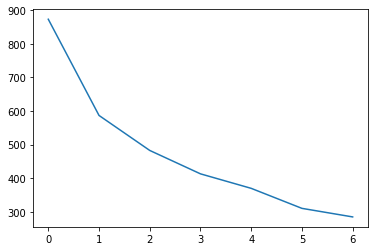

In [84]:
#let's proceed to the elbow curve method
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(rfm_df_scaled)
    ssd.append([kmeans.inertia_])
    
plt.plot(ssd)


#### From the Elbow Curve, 3 clusters (index=1) seems fine for clustering our dataset.

### Finding the Optimal Number of Clusters using Silhouette Analysis

In [85]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4772389734172778
For n_clusters=3, the silhouette score is 0.4200380405745469
For n_clusters=4, the silhouette score is 0.4063470138491237
For n_clusters=5, the silhouette score is 0.40423782134777614
For n_clusters=6, the silhouette score is 0.3378481573819303
For n_clusters=7, the silhouette score is 0.29777951269131336
For n_clusters=8, the silhouette score is 0.3012038937531081


#### From the Silhouette Analysis, any number of clusters from 2 to 5 seems fine for clustering our dataset.

# KMeans with the K=3

#### Selecting K=3 for our final model (based on Elbow Curve and Silhouette Score)

In [86]:
kmeans = KMeans(n_clusters=3, max_iter=50)

kmeans.fit(rfm_df_scaled)

kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [87]:
# assigning the labels to our original dataframe

country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [88]:
# Checking the number of observations in each cluster

country_df['cluster_id'].value_counts()

0    90
1    48
2    28
Name: cluster_id, dtype: int64

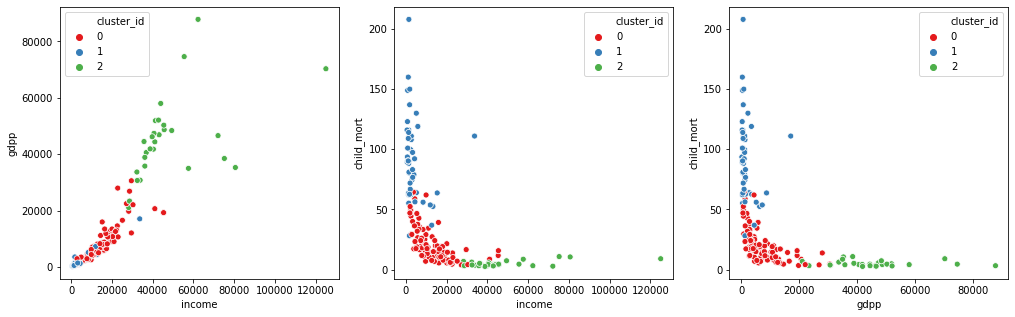

In [89]:
plt.figure(figsize=(17,5))

# Visualising the clusters using income and gdpp
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df, palette='Set1')

# Visualising clusters using income and child_mort
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = country_df, palette='Set1')

# Visualising clusters using gdpp and child_mort
plt.subplot(1,3,3)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = country_df, palette='Set1')

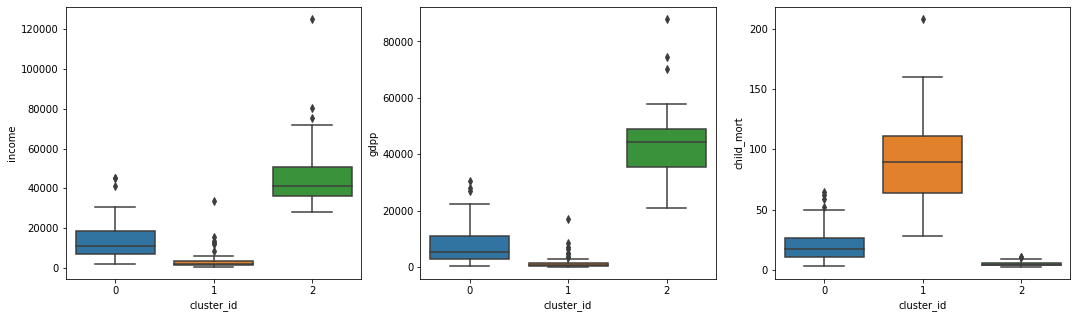

In [90]:
plt.figure (figsize=(18,5))

# Visualising clusters for income
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='income', data=country_df)

# Visualising clusters for gdpp
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)

# Visualising clusters for child_mort
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)

# Cluster Profiling - K means

In [91]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [92]:
# Getting mean values for each cluster

country_df.drop('country', axis = 1).groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.160078,73.393333,2.242444,7808.577778
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,5.060714,25013.103571,4114.428929,21018.764286,47928.571429,2.850143,80.450000,1.758571,45200.000000


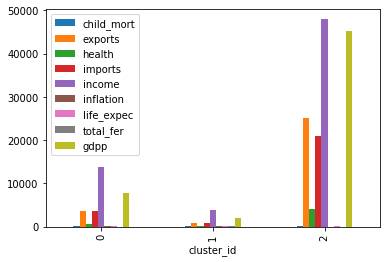

In [93]:
country_df.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

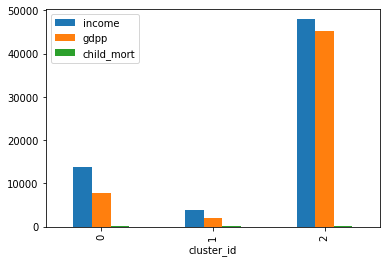

In [94]:
# Plotting bar graph with mean for income, gdpp, and child_mort

country_df.drop('country', axis = 1)[['income','gdpp','child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

#### Since Cluster 1 has the highest mortality rate, along with the lowest Income and GDP, it is the ideal cluster for the NGO to concentrate upon.

In [95]:
country_df[country_df['cluster_id']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [96]:
# Sorting the countries in Cluster 0 on the basis of having low income and gdp, and high child mortality

kmeans_final_cluster =country_df[country_df['cluster_id']==1].sort_values(by=['child_mort',"income", 'gdpp'], ascending=[False, True, True])
kmeans_final_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,1


# Hierarchical Clustering

In [97]:
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.285378,-0.543227,-0.566958,-0.567422,-0.820598,0.154565,-1.614114,1.896292,-0.702817
1,-0.543908,-0.449295,-0.435152,-0.387364,-0.368021,-0.313930,0.656110,-0.864627,-0.493159
2,-0.277965,-0.400391,-0.482929,-0.448158,-0.206464,0.784905,0.678700,-0.043634,-0.471227
3,2.001185,-0.358458,-0.532727,-0.436365,-0.587238,1.381172,-1.173623,2.121403,-0.526353
4,-0.700490,-0.069585,-0.162319,0.150713,0.130793,-0.602599,0.712583,-0.546823,-0.012432


In [98]:
# Original country dataframe

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [99]:
# Removing cluster_id column before doing hierarchical clustering

country_df.drop(['cluster_id'],axis=1,inplace=True)

### Single Linkage Hierarchical Clustering

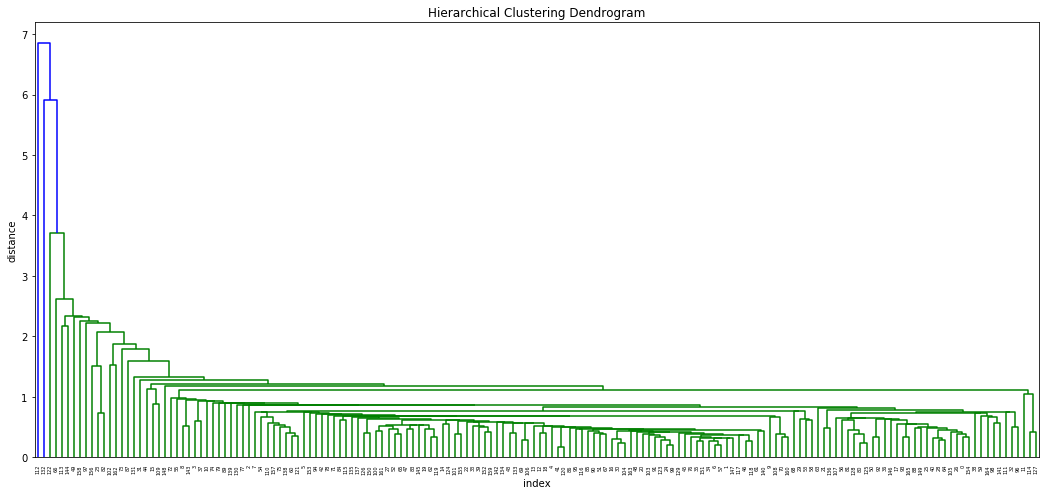

In [101]:
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings = linkage(rfm_df_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage Hierarchical Clustering

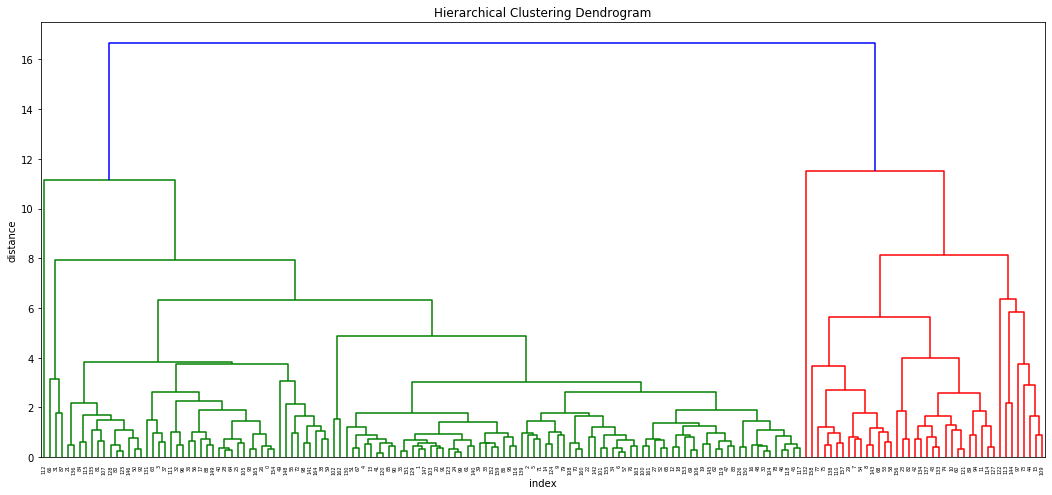

In [102]:
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Taking number of clusters = 4

In [103]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [104]:
# Assigning cluster labels to our dataset

country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [105]:
# Checking the number of observations in each cluster

country_df['cluster_labels'].value_counts()


0    125
1     39
3      1
2      1
Name: cluster_labels, dtype: int64

#### Cluster segmentation does not look good.

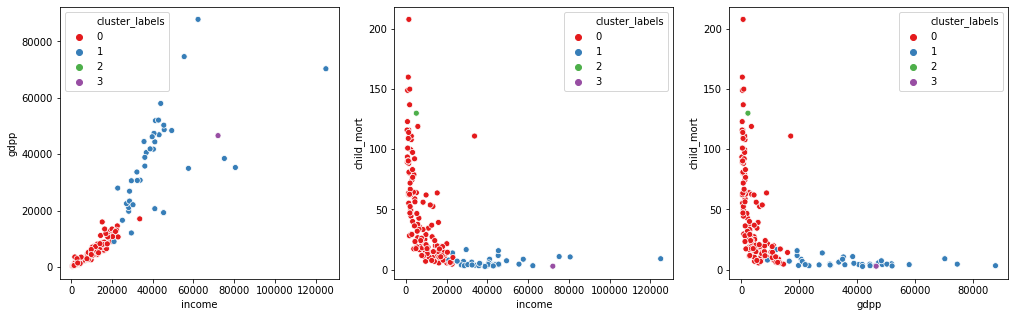

In [106]:
plt.figure(figsize=(17,5))

# Visualising the clusters using income and gdpp
plt.subplot(1,3,1)
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = country_df, palette='Set1')

# Visualising clusters using income and child_mort
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = country_df, palette='Set1')

# Visualising clusters using gdpp and child_mort
plt.subplot(1,3,3)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = country_df, palette='Set1')

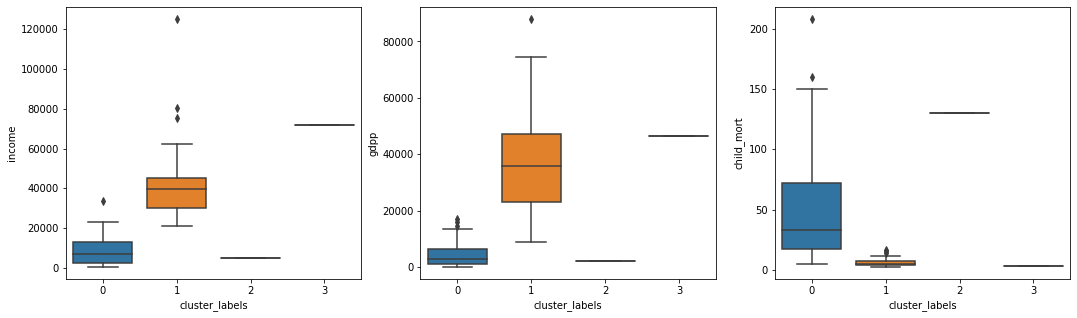

In [107]:
plt.figure (figsize=(18,5))

# Visualising clusters for income
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='income', data=country_df)

# Visualising clusters for gdpp
plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df)

# Visualising clusters for child_mort
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df)

# Cluster Profiling - Hierarchical

In [108]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [109]:
# Calculating the mean values for all metrics

country_df.drop('country', axis = 1).groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels,,,,,,,,,
0,48.12320,1857.956220,283.153529,2010.219057,8396.104000,8.364192,67.696800,3.288720,4360.912000
1,6.15641,18704.085385,3357.904179,15856.102564,42171.794872,3.755590,79.389744,1.861538,37588.974359
2,130.00000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000
3,2.80000,93200.000000,1845.360000,81084.000000,72100.000000,-0.046000,82.700000,1.150000,46600.000000


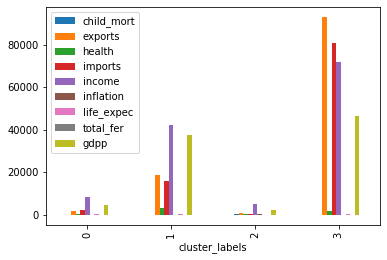

In [110]:
country_df.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

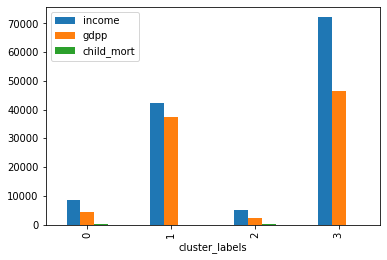

In [111]:
# Bar graph for income, gdpp and child mortality

country_df.drop('country', axis = 1)[['income','gdpp','child_mort','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [112]:
country_df[country_df['cluster_labels']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 125, dtype: object

In [113]:
# Sorting data on the basis of low income and gdpp, and high child mortality

country_df[country_df['cluster_labels']==0].sort_values(by=["income", 'gdpp','child_mort'], ascending=[True, True, False]) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0
...,...,...,...,...,...,...,...,...,...,...,...
121,Poland,6.0,5052.6000,939.9600,5304.600,21800,1.66,76.3,1.41,12600,0
67,Hungary,6.0,10715.8000,960.2300,10021.500,22300,2.33,74.5,1.25,13100,0
51,Estonia,4.5,10964.6000,880.3800,10030.200,22700,1.74,76.0,1.72,14600,0
125,Russia,10.0,3124.4000,543.5600,2257.700,23100,14.20,69.2,1.57,10700,0


# Final Analysis

#### Since Clusters formed using Heirarchical Clustering are not suitable, its better to proceed forward with KMeans Clusters to identify which countries should be looked at for aid by the NGO.

In [114]:
kmeans_final_cluster.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,1.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,1.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,1.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,1.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


#### child_mort mean value is 91.61
#### income mean value is 3897.35
#### gdpp mean value is 1909.21

In [115]:
# Filtering the final countries which have child mortality rate higher than the mean, income and gdpp lower than the mean values

kmeans_final_cluster[(kmeans_final_cluster.child_mort>91.61) & (kmeans_final_cluster.income<3897.35) & (kmeans_final_cluster.gdpp<1909.21)].country.head(10)

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
112                       Niger
37             Congo, Dem. Rep.
25                 Burkina Faso
64                Guinea-Bissau
17                        Benin
Name: country, dtype: object

# Final Recommendation

<b> The countries that are most in need of help from the NGO:
   - Haiti
   - Sierra Leon
   - Chad
   - Central African Republic
   - Mali
   - Niger
   - Congo, Dem. Rep.
   - Burkina Faso
   - Guinea-Bissau
   - Benin
</b>   